## Imports

In [20]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
%autosave 180

Autosaving every 180 seconds


## Generate the dataset

In [4]:
df = pd.DataFrame(np.random.randint(0, 2, size=(30, 8)), columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
df['y'] = df.sum(axis=1)
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1,1,1,0,0,0,1,0,4
1,0,0,1,0,0,1,1,0,3
2,0,0,0,0,0,0,1,0,1
3,0,1,0,1,1,0,0,1,4
4,0,1,0,0,0,0,1,0,2
5,0,0,1,1,0,0,0,1,3
6,0,1,1,1,0,0,1,0,4
7,0,1,0,1,0,1,0,0,3
8,0,0,1,1,0,0,1,1,4
9,1,0,1,1,0,1,1,0,5


## Adder with the Elman Recurrent Neural Network

We'll build an Elman Recurrent Neural Network to predict the sum of 8 bits. We have one neuron that has two inputs : the input bit $x_{n}$ and the previous output $f_{t-1}$.

As we want to have a linear model, the activation function will be the identity, and we don't need a bias.

<img src="archi.png">

In [39]:
class ElmanRNNAdder():
    
    def __init__(self):
        # Our two weights initialized randomly between -1 and 1
        self.Vx = np.random.normal(1.0, 1.0)
        self.Vf = np.random.normal(1.0, 1.0)
        
        # Learning rates
        self.lr_x = 0.005
        self.lr_f = 0.005
        
        # Number of features
        self.T = 0
        
        # Neuron output matrix
        self.f = None
        
        # Error
        self.err = []
        
        # Historic of gradients
        self.hist_Vx = []
        self.hist_Vf = []
    
    def forward(self, X):
        self.f = np.zeros((X.shape[0], X.shape[1] + 1))
        
        for t in range(self.T):
            self.f[:, t + 1] = self.Vf * self.f[:, t] + self.Vx * X[:, t]
        
        return self.f[:, -1]
    
    def compute_sse(self, y_hat, y):
        sse = 0.5 * np.sum(np.square(y_hat - y))
        return sse
    
    def compute_mae(self, y_hat, y):
        mae = np.sum(np.absolute(y_hat - y)) / y_hat.shape[0]
        return mae
    
    def backward(self, X, y, y_hat):
        dVx = 0
        dVf = 0
        
        for t in range(self.T):
            dVx += (np.sum((y_hat - y) * X[:, t]) * (self.Vf ** (self.T - t)))
            dVf += (np.sum((y_hat - y) * self.f[:, t - 1]) * (self.Vf ** (self.T - t)))
            
        self.Vx -= (self.lr_x * dVx)
        self.Vf -= (self.lr_f * dVf)
        
        self.hist_Vx.append(self.Vx)
        self.hist_Vf.append(self.Vf)
        
    def plot_hist(self):
        plt.plot([i for i in range(len(self.err))], self.err)
        plt.show()
        plt.plot([i for i in range(len(self.hist_Vx))], self.hist_Vx)
        plt.plot([i for i in range(len(self.hist_Vf))], self.hist_Vf)
        plt.show()
    
    def fit(self, X, y, nb_epoch=50):
        self.T = X.shape[1]
        
        for k in range(nb_epoch):
            y_hat = self.forward(X)

            self.err.append(self.compute_sse(y_hat, y))

            self.backward(X, y, y_hat)
            
        self.plot_hist()
        
    def predict(self, X, y):
        # Compute prediction
        y_hat = self.forward(X)
        
        # Compute Mean Absolute Error
        mae = self.compute_mae(y_hat, y)
        
        # Print results
        for i in range(X.shape[0]):
            print('Seq:', X[i], '| y =', y[i], '| y_hat =', y_hat[i])
        print('MAE =', mae)

c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in multiply
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: Runti

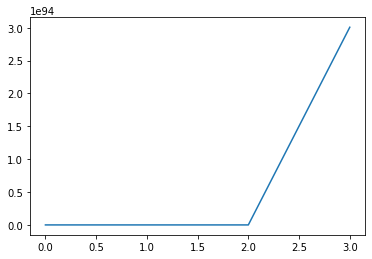

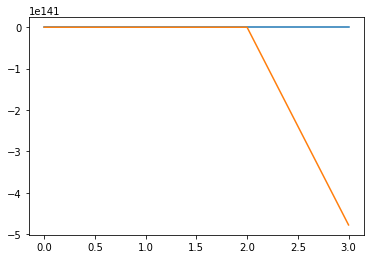

In [41]:
X, y = df.drop(columns='y').values, df['y'].values
train_X, test_X, train_y, test_y = X[:25], X[25:], y[:25], y[25:]


model = ElmanRNNAdder()
model.fit(train_X, train_y)

In [42]:
model.predict(test_X, test_y)

Seq: [1 0 0 1 0 1 0 0] | y = 3 | y_hat = nan
Seq: [0 1 0 1 0 0 1 0] | y = 3 | y_hat = nan
Seq: [1 0 0 0 0 1 1 0] | y = 3 | y_hat = nan
Seq: [0 0 1 0 0 1 0 1] | y = 3 | y_hat = nan
Seq: [0 0 1 1 1 0 1 1] | y = 5 | y_hat = nan
MAE = nan
